<a href="https://colab.research.google.com/github/TonyQ2k3/pytorch-training/blob/main/exercises/exercise_day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise - Day 2

### 1. Create, train and evaluate a linear regression model
weight = 0.6, bias = 0.4

In [1]:
# Import
import torch
from torch import nn
import matplotlib.pyplot as plt

In [4]:
# Create dataset
weight = 0.6
bias = 0.4

x = torch.arange(0, 1, 0.02, dtype=torch.float).unsqueeze(dim=1)
y = weight * x + bias

split_index = int(0.8 * len(x))
x_train, y_train = x[:split_index], y[:split_index]
x_test, y_test = x[split_index:], y[split_index:]

print(f"Training data: {x_train[:10]}")
print(f"Training labels: {y_train[:10]}")

Training data: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
Training labels: tensor([[0.4000],
        [0.4120],
        [0.4240],
        [0.4360],
        [0.4480],
        [0.4600],
        [0.4720],
        [0.4840],
        [0.4960],
        [0.5080]])


In [8]:
# Create visualization function
def plot_visualizer(
    train_data=x_train,
    train_labels=y_train,
    test_data=x_test,
    test_labels=y_test,
    predictions=None
):
  plt.figure(figsize=(10, 7))

  plt.title("Data & Labels Visualization")
  plt.xlabel("Data")
  plt.ylabel("Labels")

  plt.scatter(train_data, train_labels, s=4, c='b', label="Train")
  plt.scatter(test_data, test_labels, s=4, c='g', label="Test")

  if predictions is not None:
    plt.scatter(test_data, predictions, s=4, c='r', label="Prediction")

  plt.legend(prop={"size": 14})
  plt.show()

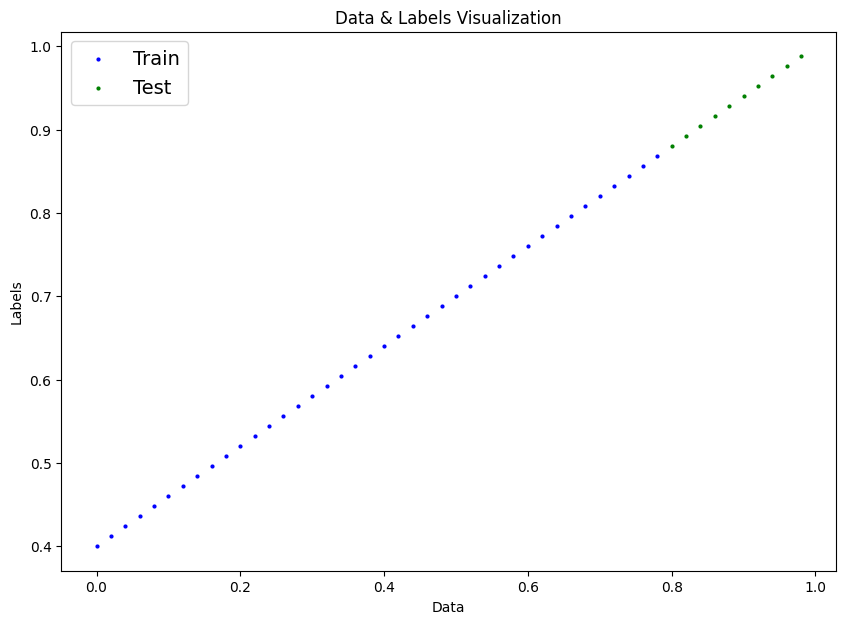

In [9]:
plot_visualizer()

In [10]:
# Define the model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

In [28]:
# Create model instance
model = LinearRegressionModel()
print(f"Initial Parameters: {model.state_dict()}")

Initial Parameters: OrderedDict([('weight', tensor([-1.3281])), ('bias', tensor([0.6391]))])


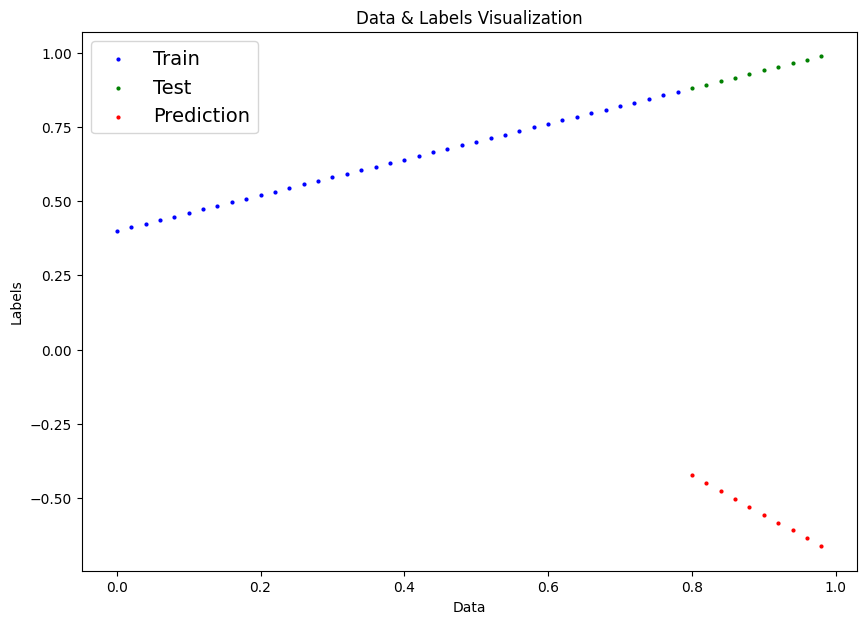

In [29]:
# Initial prediction
with torch.inference_mode():
  y_preds = model(x_test)

plot_visualizer(predictions=y_preds)

In [32]:
# Choose loss function
loss_fn = nn.L1Loss()
# Choose optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
# Choose epoch
epochs = 500

# Start training
model.train()

for epoch in range(epochs):
  # Make prediction
  y_preds = model(x_train)
  # Calculate loss
  loss = loss_fn(y_preds, y_train)
  # Reset gradient
  optimizer.zero_grad()
  # Calculate loss gradient
  loss.backward()
  # Adjust parameters
  optimizer.step()
  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch {epoch}: Loss = {loss}")


Epoch 0: Loss = 0.009968029335141182
Epoch 100: Loss = 0.004463237710297108
Epoch 200: Loss = 0.004463237710297108
Epoch 300: Loss = 0.004463237710297108
Epoch 400: Loss = 0.004463237710297108


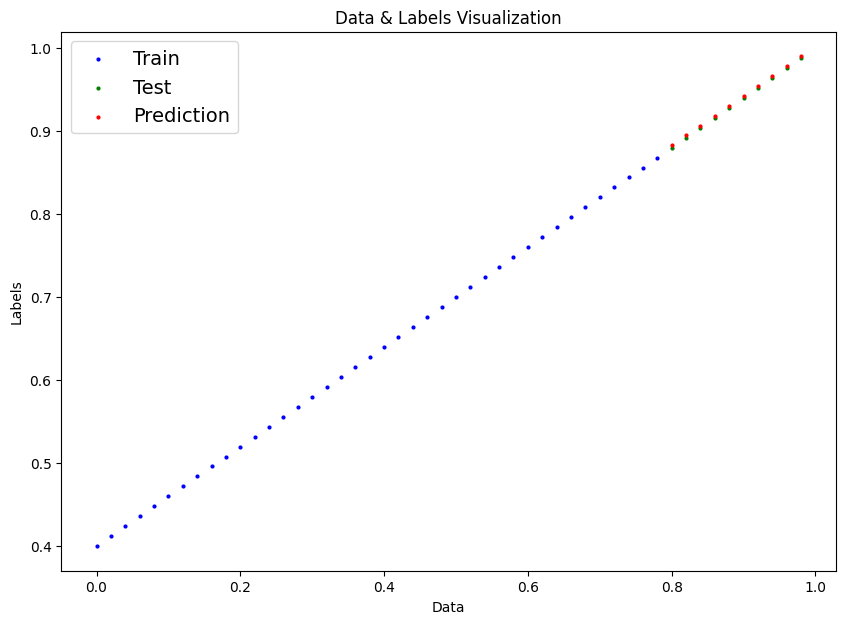

In [35]:
# Evaluation time
model.eval()

with torch.inference_mode():
  y_preds = model(x_test)

plot_visualizer(predictions=y_preds)